# Proyecto 03 - Sistemas de Recomendación

## Dataset: STEAM

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Son dos archivos, uno de calificaciones y otro de información sobre los juegos.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset. Sin embargo, **deberás** modificarlas para hacer un mejor manejo de datos. Algunas cosas a las que deberás prestar atención (tal vez no a todas):
1. Tipos de datos: elige tipos de datos apropiados para cada columna.
2. Descartar columnas poco informativas.
3. Guardar en memoria datasets preprocesados para no tener que repetir código que tarde en correr.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿cuáles son los juegos más populares?¿Y los menos populares?

### Filtro Colaborativo

Deberás implementar un sistema de recomendación colaborativo para este dataset. Ten en cuenta:

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.

Puedes implementar un filtro colaborativo a partir de la similitud coseno o índice de Jaccard. ¿Puedes utilizar los métodos de la librería Surprise? Si no es así, busca implementaciones (por ejemplo, nuevas librerías) que sean apropiadas.

Para comenzar a trabajar, puedes asumir que cada entrada es un enlace entre una persona usuaria y un item, **independientemente** de si la crítica es buena o mala. 

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo harías para ponerle un valor a la calificación?
1. ¿Cómo harías para agregar contenido? Por ejemplo, cuentas con el género, precio, fecha de lanzamiento y más información de los juegos.
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [1]:
import gzip
import pandas as pd

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

**Reviews**

In [2]:
contador = 0
data_reviews = []
# Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
# abrira uno de cada tres, y asi.
n = 10
for l in parse('steam_reviews.json.gz'):
    if contador%n == 0:
        data_reviews.append(l)
    else:
        pass
    contador += 1


In [3]:
data_reviews = pd.DataFrame(data_reviews)

In [4]:
data_reviews.head(5)

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,compensation,found_funny
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,Ariman1,13.2,1386.0,328100,2,2017-08-02,Addictive RPG ! Works fine on linux though it ...,False,1,NaN,NaN,NaN
2,freakfantom,0.1,1706.0,725280,5,2017-11-12,Прикольная стрелялка. Взял дешево на распродаже.,False,1,NaN,NaN,NaN
3,The_Cpt_FROGGY,7.8,2217.0,631920,0,2017-12-11,Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...,False,1,76561198003030375,Product received for free,NaN
4,the_maker988,8.2,18.0,35140,7,2018-01-02,"This game was way to linear for me, and compar...",False,1,76561198353396844,NaN,NaN


**Games**

In [5]:
data_games = []
for l in parse('steam_games.json.gz'):
    data_games.append(l)
data_games = pd.DataFrame(data_games)

In [6]:
data_games.head(5)

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


In [7]:
data_reviews.isna().sum()

username             0
hours             2637
products          1566
product_id           0
page_order           0
date                 0
text                 0
early_access         0
page                 0
user_id         461967
compensation    764719
found_funny     659143
dtype: int64

Text(0, 0.5, 'Frecuencia por bins')

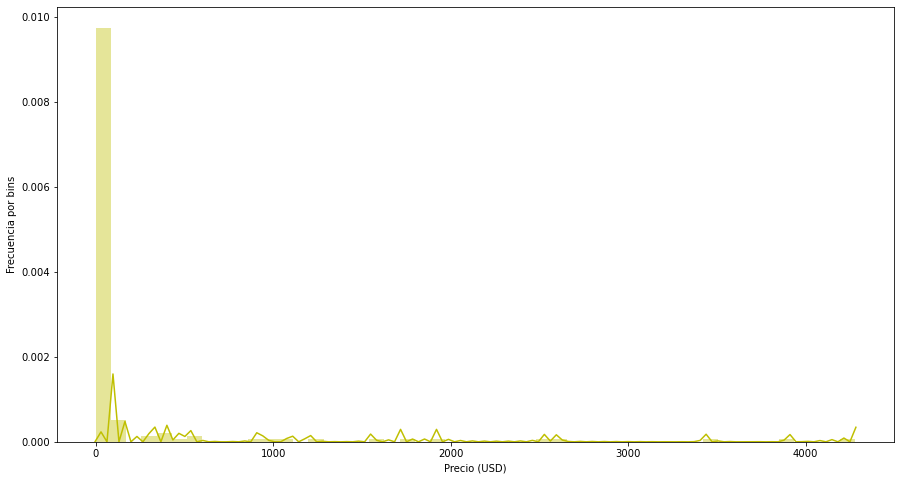

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,8))
ax = sns.distplot(data_games.price.value_counts(), color="y")
ax.set_xlabel('Precio (USD)')
ax.set_ylabel('Frecuencia por bins')

Observamos en la distribución de los precios de los juegos que la mayoría se encuentra entre 0 y 30 USD.

Text(0, 0.5, 'Frecuencia por bins')

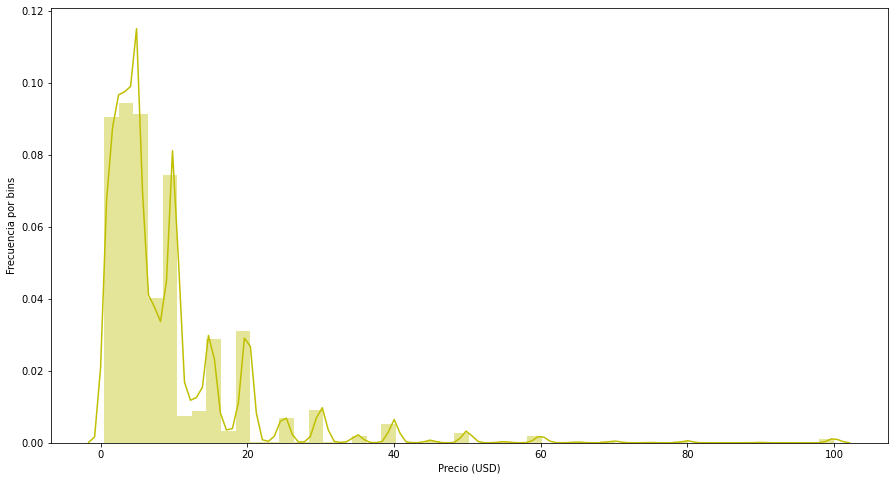

In [9]:
data_games2 = data_games.drop(data_games[(data_games.price == 'Free To Play') |
                                         (data_games.price == 'Free to Play') |
                                        (data_games.price == 'Free') |
                                        (data_games.price == 'Free Demo') |
                                        (data_games.price == 'Play for Free!') |
                                        (data_games.price == 'Install Now') |
                                        (data_games.price == 'Play WARMACHINE: Tactics Demo') |
                                        (data_games.price == 'Free Mod') |
                                        (data_games.price == 'Install Theme') |
                                        (data_games.price == 'Third-party') |
                                        (data_games.price == 'Play Now') |
                                        (data_games.price == 'Free HITMAN™ Holiday Pack') |
                                        (data_games.price == 'Play the Demo') |
                                        (data_games.price == 'Starting at $499.00')|
                                        (data_games.price == 'Starting at $449.00') |
                                        (data_games.price == 'Free to Try') |
                                        (data_games.price == 'Free Movie') |
                                        (data_games.price == 'Free To Use') |
                                        (data_games.price == 'Free to Use')].index)

data_games2 = data_games2[data_games2.price<=100]
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.distplot(data_games2.price, color="y")
ax.set_xlabel('Precio (USD)')
ax.set_ylabel('Frecuencia por bins')

Para entender cuales son los juegos más relevantes según los usuarios que realizaron reviewas, haremos un match de los 100 juegos con mas reviews del dataset, tal que tengan mas de 5 horas acumuladas de uso del juego por usuario

In [10]:
import time

match = pd.DataFrame(columns=['publisher','genres','app_name','title','total_hours_played','url','release_date','tags','discount_price','reviews_url','specs','price','early_access','id','developer','sentiment','metascore']  )
for i in range(0,100):
    print(i, end="\r")
    time.sleep(0.1)
    match_id=data_reviews[data_reviews.hours > 5].product_id.value_counts().index[i]
    match=match.append(data_games[data_games.id==match_id])
    match['total_hours_played'].iloc[i]=data_reviews[data_reviews.product_id == str(match_id)].product_id.astype(int).sum()

match.head(3)

,publisher,genres,app_name,title,total_hours_played,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
31856,Valve,"[Action, Free to Play]",Team Fortress 2,Team Fortress 2,8084120,http://store.steampowered.com/app/440/Team_For...,2007-10-10,"[Free to Play, Multiplayer, FPS, Action, Shoot...",NaN,http://steamcommunity.com/app/440/reviews/?bro...,"[Multi-player, Cross-Platform Multiplayer, Ste...",Free to Play,False,440,Valve,Very Positive,92
29692,Facepunch Studios,"[Action, Adventure, Indie, Massively Multiplay...",Rust,Rust,2580700290,http://store.steampowered.com/app/252490/Rust/,2013-12-11,"[Early Access, Survival, Crafting, Multiplayer...",NaN,http://steamcommunity.com/app/252490/reviews/?...,"[Multi-player, MMO, Cross-Platform Multiplayer...",19.99,True,252490,Facepunch Studios,Very Positive,NaN
30746,"2K Games, Aspyr (Mac &amp;amp; Linux)","[Action, RPG]",Borderlands 2,Borderlands 2,362535920,http://store.steampowered.com/app/49520/Border...,2012-09-17,"[FPS, Co-op, Action, RPG, Loot, Shooter, Open ...",NaN,http://steamcommunity.com/app/49520/reviews/?b...,"[Single-player, Co-op, Steam Achievements, Ful...",19.99,False,49520,"Gearbox Software,Aspyr (Mac &amp; Linux)",Overwhelmingly Positive,89


¿Cuántos usuarios únicos hay?

In [11]:
len(data_reviews.user_id)

779307

¿Cuántos juegos calificó cada usuario?

In [12]:
data_reviews.username.value_counts()

123                     213
Alex                    190
Chris                   155
Nick                    143
Matt                    137
                       ... 
Small Weiner CuckBoi      1
Radiant Silvertuna        1
i need dis                1
Icarus [MAG]              1
Wehomir                   1
Name: username, Length: 540341, dtype: int64

¿cuáles son los juegos más populares?

In [13]:
for i in range(0,9):
    print(data_games[data_games.id==str(data_reviews.product_id.value_counts().index[i])].title.values)

['Team Fortress 2']
['Rust']
['Borderlands 2']
['Fallout 4']
['Grand Theft Auto V']
['Undertale']
['Portal 2']
['Warframe']
['DayZ']


¿cuáles son los juegos menos populares

In [14]:
for i in range(0,9):
    print(data_games[data_games.id==str(data_reviews.product_id.value_counts(ascending=True).index[i])].title.values)

['Stick Nightmare']
['I.F.O']
['AutoTileGen']
['Zombie Town']
['Squareboy vs Bullies: Arena Edition']
['Ball of Wonder']
['Survival Is Not Enough']
['Hacker Series']
['Mercury: Cascade into Madness']


Eliminaremos los valores faltantes de user_id, product_id y metascore.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

¿Cuantos valores faltantes realmente existen en los features product_id, user_id y metascore?

In [16]:
data_reviews.product_id.isna().sum()

0

In [17]:
data_reviews.user_id.isna().sum()

461967

In [18]:
data_reviews.product_id = data_reviews.product_id.replace(['NA'],np.nan)
data_reviews = data_reviews[~data_reviews.product_id.isna()]
data_reviews = data_reviews[~data_reviews.user_id.isna()]
data_reviews.shape

(317340, 12)

¿Cuantas horas jugo cada usuario?

Text(0.5, 1.0, 'Horas totales que jugó cada usuario (Top 10)')

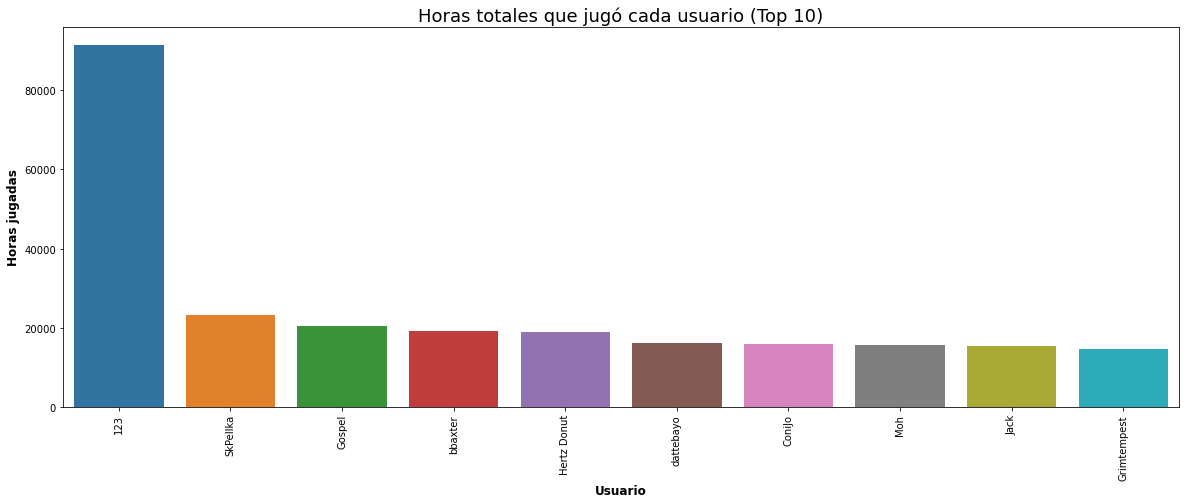

In [19]:
orden = data_reviews.groupby(["username"])['hours'].sum().reset_index().sort_values('hours', ascending=False)
orden.reset_index(drop = True, inplace = True)

plt.figure(figsize = (20,7))

sns.barplot(x = orden.username[0:10], y = orden.hours[0:10])
plt.xticks(rotation = 90)
plt.xlabel("Usuario", fontweight = "black", fontsize = 12)
plt.ylabel("Horas jugadas", fontweight = "black", fontsize = 12)
plt.title("Horas totales que jugó cada usuario (Top 10)", fontsize=18)

¿Cómo es la distribución de las calificaciones y horas jugadas?

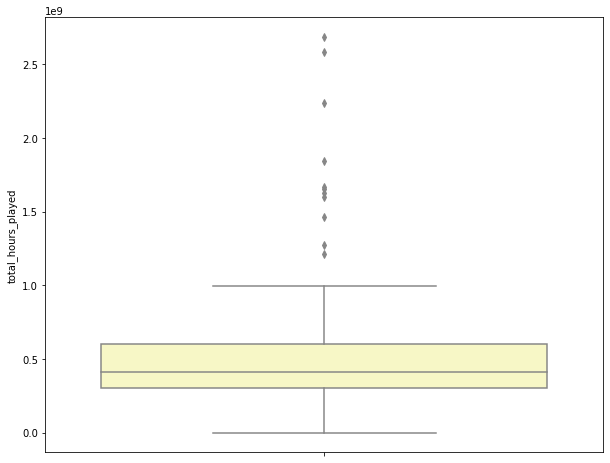

In [20]:
plt.subplots(figsize=(10,8))
sns.boxplot(x=match['total_hours_played'], orient= "v", palette="Spectral")

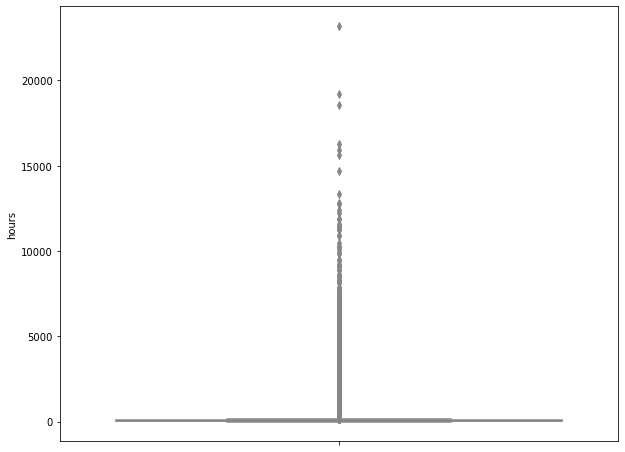

In [21]:
plt.subplots(figsize=(10,8))
sns.boxplot(x=data_reviews[~data_reviews['hours'].isna()]['hours'], orient= "v", palette="Spectral")

Existen juegos y usuarios con cantidades de horas jugadas que pueden considerarse como outliers, las cuales eliminaremos.

In [22]:
valor_medio = data_reviews['hours'].mean()
std = data_reviews['hours'].std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers = np.logical_or(data_reviews['hours'] < minimo, data_reviews['hours'] > maximo)
print(valor_medio, std, minimo, maximo)

121.55963288839746 387.9906123717938 -1042.4122042269842 1285.5314700037788


In [23]:
mascara_outliers.value_counts()

False    311858
True       5482
Name: hours, dtype: int64

In [24]:
data_reviews = data_reviews[~mascara_outliers]
data_reviews['hours'].describe()

count    311043.000000
mean         82.391113
std         173.468635
min           0.000000
25%           4.600000
50%          17.800000
75%          67.400000
max        1285.400000
Name: hours, dtype: float64

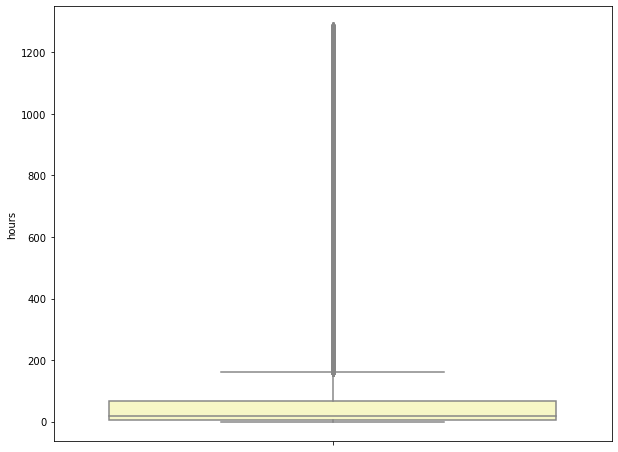

In [25]:
plt.subplots(figsize=(10,8))
sns.boxplot(x=data_reviews[~data_reviews['hours'].isna()]['hours'], orient= "v", palette="Spectral")

Filtraremos los juegos jugados por más de 2 usuarios y por mas de 20 horas por usuario

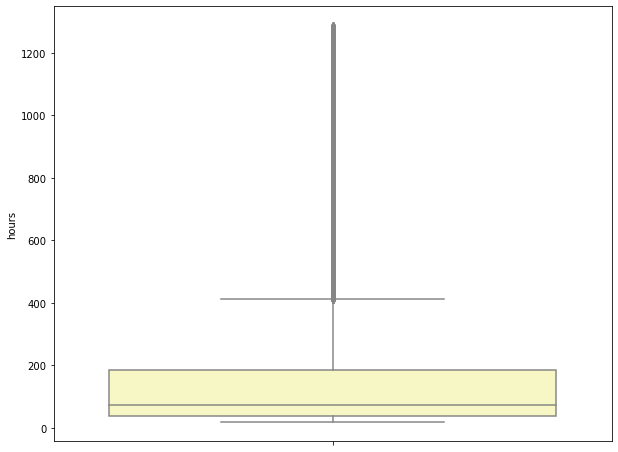

In [26]:
data_reviews = data_reviews[data_reviews['hours'] >= 20]
plt.subplots(figsize=(10,8))
sns.boxplot(x=data_reviews[~data_reviews['hours'].isna()]['hours'], orient= "v", palette="Spectral")

In [27]:
data_reviews.user_id.value_counts()

76561197969749884    56
76561198011965365    12
76561198010131631    10
76561197990406921     9
76561197991657927     9
                     ..
76561198030760185     1
76561198002637706     1
76561198024998902     1
76561198041156673     1
76561198040724735     1
Name: user_id, Length: 135197, dtype: int64

Eliminaremos los juegos con menos de 2 reviews

In [28]:
print(data_reviews.shape)
data_reviews = data_reviews.groupby('user_id').filter(lambda x: len(x) >= 2)
data_reviews.user_id.value_counts()
print(data_reviews.shape)

(148172, 12)
(23610, 12)


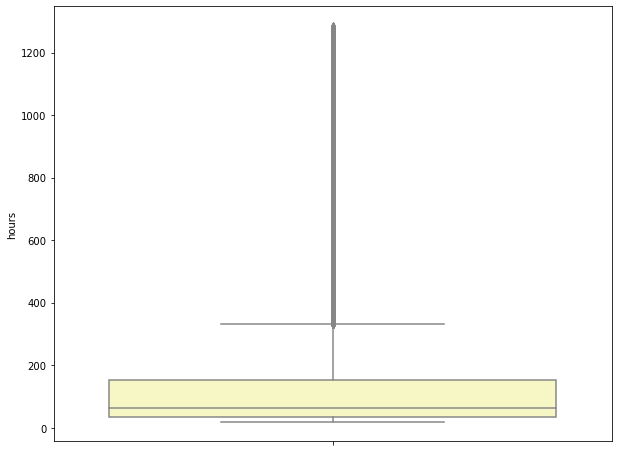

In [29]:
plt.subplots(figsize=(10,8))
sns.boxplot(x=data_reviews[~data_reviews['hours'].isna()]['hours'], orient= "v", palette="Spectral")

¿Cuál es el juego con más reviews?

In [30]:
match.iloc[0]

publisher                                                         Valve
genres                                           [Action, Free to Play]
app_name                                                Team Fortress 2
title                                                   Team Fortress 2
total_hours_played                                              8084120
url                   http://store.steampowered.com/app/440/Team_For...
release_date                                                 2007-10-10
tags                  [Free to Play, Multiplayer, FPS, Action, Shoot...
discount_price                                                      NaN
reviews_url           http://steamcommunity.com/app/440/reviews/?bro...
specs                 [Multi-player, Cross-Platform Multiplayer, Ste...
price                                                      Free to Play
early_access                                                      False
id                                                              

Ordenamos los juegos por popularidad

In [31]:
match.head()

,publisher,genres,app_name,title,total_hours_played,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
31856,Valve,"[Action, Free to Play]",Team Fortress 2,Team Fortress 2,8084120,http://store.steampowered.com/app/440/Team_For...,2007-10-10,"[Free to Play, Multiplayer, FPS, Action, Shoot...",NaN,http://steamcommunity.com/app/440/reviews/?bro...,"[Multi-player, Cross-Platform Multiplayer, Ste...",Free to Play,False,440,Valve,Very Positive,92
29692,Facepunch Studios,"[Action, Adventure, Indie, Massively Multiplay...",Rust,Rust,2580700290,http://store.steampowered.com/app/252490/Rust/,2013-12-11,"[Early Access, Survival, Crafting, Multiplayer...",NaN,http://steamcommunity.com/app/252490/reviews/?...,"[Multi-player, MMO, Cross-Platform Multiplayer...",19.99,True,252490,Facepunch Studios,Very Positive,NaN
30746,"2K Games, Aspyr (Mac &amp;amp; Linux)","[Action, RPG]",Borderlands 2,Borderlands 2,362535920,http://store.steampowered.com/app/49520/Border...,2012-09-17,"[FPS, Co-op, Action, RPG, Loot, Shooter, Open ...",NaN,http://steamcommunity.com/app/49520/reviews/?b...,"[Single-player, Co-op, Steam Achievements, Ful...",19.99,False,49520,"Gearbox Software,Aspyr (Mac &amp; Linux)",Overwhelmingly Positive,89
25017,Bethesda Softworks,[RPG],Fallout 4,Fallout 4,2682739080,http://store.steampowered.com/app/377160/Fallo...,2015-11-09,"[Open World, Post-apocalyptic, Exploration, Si...",NaN,http://steamcommunity.com/app/377160/reviews/?...,"[Single-player, Steam Achievements, Full contr...",29.99,False,377160,Bethesda Game Studios,Mixed,84
26955,Rockstar Games,"[Action, Adventure]",Grand Theft Auto V,Grand Theft Auto V,1623021840,http://store.steampowered.com/app/271590/Grand...,2015-04-14,"[Open World, Action, Multiplayer, First-Person...",NaN,http://steamcommunity.com/app/271590/reviews/?...,"[Single-player, Multi-player, Steam Achievemen...",39.99,False,271590,Rockstar North,Mixed,96


In [32]:
data_games = data_games.rename(columns={'id':'product_id'})
data_reviews = data_reviews.merge(data_games, on='product_id', how='left')

data_reviews.metascore = data_reviews.metascore.replace(['NA'],np.nan)
data_reviews.metascore = data_reviews.metascore.astype(np.float32)
data_reviews.product_id = data_reviews.product_id.astype(int) 

data_reviews.metascore.value_counts()

84.0    1504
81.0    1064
88.0    1018
89.0    1011
83.0     903
92.0     854
78.0     839
79.0     641
74.0     615
76.0     540
80.0     540
82.0     527
77.0     513
86.0     509
85.0     481
87.0     475
70.0     404
96.0     387
90.0     364
69.0     364
75.0     360
73.0     350
91.0     301
68.0     251
72.0     224
95.0     146
94.0     143
62.0     134
93.0     130
63.0     129
71.0     112
61.0     104
66.0      89
64.0      88
67.0      83
65.0      79
54.0      30
33.0      24
53.0      22
58.0      21
57.0      21
59.0      20
51.0      14
60.0      14
55.0      12
49.0      12
43.0      10
56.0      10
52.0       7
44.0       6
45.0       4
48.0       4
47.0       3
46.0       2
41.0       1
40.0       1
Name: metascore, dtype: int64

In [33]:
print(data_reviews.shape)
data_reviews = data_reviews[~data_reviews.metascore.isna()]
print(data_reviews.shape)

(23625, 27)
(16514, 27)


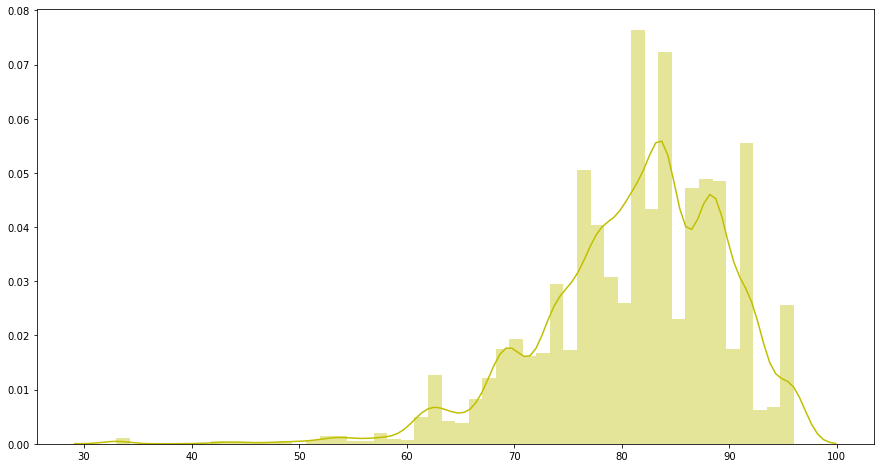

In [34]:
plt.subplots(figsize=(15,8))
sns.distplot(data_reviews.metascore.astype(int).values, color="y")

In [35]:
data_reviews = data_reviews.drop(columns=['products','page_order','date','text','early_access_x','page','found_funny','compensation','publisher','app_name','url','release_date','tags','discount_price','reviews_url','specs','early_access_y','developer','sentiment'])
data_reviews.head(2)

,username,hours,product_id,user_id,genres,title,price,metascore
1,FireBolt,58.1,271590,76561198218134795,"[Action, Adventure]",Grand Theft Auto V,39.99,96.0
2,Emperor Palpatine,40.7,271590,76561198048098140,"[Action, Adventure]",Grand Theft Auto V,39.99,96.0


In [36]:
data_games = data_games[~data_games.product_id.isna()]
data_games.product_id = data_games.product_id.astype(int)

## Entrenamiento de modelos de sistema de recomendación

Eligiremos como target el feature metascore.
Metascore: Es la puntuación que tiene el juego según una página externa llamada Metacritic.

In [37]:
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import KNNBasic,  KNNWithMeans, KNNBaseline
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV


reader = Reader(rating_scale=(1, 100))

df1 = data_reviews.copy()
df1 = df1.drop(['metascore','genres','title','title','price'], axis=1)
df1.head(2)

,username,hours,product_id,user_id
1,FireBolt,58.1,271590,76561198218134795
2,Emperor Palpatine,40.7,271590,76561198048098140


In [38]:
data_games_train = data_games.copy()
df1= pd.merge(df1, data_games_train, on='product_id', how='inner')
df1['user_id'] = df1['user_id'].dropna()
df1 = df1[~df1['user_id'].isnull()]
df1 = df1[df1['metascore']!='NA']
df1.head(2)

,username,hours,product_id,user_id,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,developer,sentiment,metascore
0,FireBolt,58.1,271590,76561198218134795,Rockstar Games,"[Action, Adventure]",Grand Theft Auto V,Grand Theft Auto V,http://store.steampowered.com/app/271590/Grand...,2015-04-14,"[Open World, Action, Multiplayer, First-Person...",NaN,http://steamcommunity.com/app/271590/reviews/?...,"[Single-player, Multi-player, Steam Achievemen...",39.99,False,Rockstar North,Mixed,96
1,Emperor Palpatine,40.7,271590,76561198048098140,Rockstar Games,"[Action, Adventure]",Grand Theft Auto V,Grand Theft Auto V,http://store.steampowered.com/app/271590/Grand...,2015-04-14,"[Open World, Action, Multiplayer, First-Person...",NaN,http://steamcommunity.com/app/271590/reviews/?...,"[Single-player, Multi-player, Steam Achievemen...",39.99,False,Rockstar North,Mixed,96


In [39]:
data = Dataset.load_from_df(df1[['user_id', 'product_id', 'metascore']], reader)
data

In [40]:
trainset, testset = train_test_split(data, test_size=.25)
print(trainset)

## Benchmark (SVD)

In [41]:
from surprise import SVD
algo = SVD()
algo.fit(trainset)

In [42]:
predictions = algo.test(testset)
predictions[0]

Prediction(uid='76561198020469084', iid=221040, r_ui=69.0, est=73.62660524178284, details={'was_impossible': False})

In [43]:
df1[['user_id', 'product_id', 'hours']][df1['user_id']=='76561198135446411']

,user_id,product_id,hours
1756,76561198135446411,38410,276.2


Usuarios con mayor cantidad de reviews

In [44]:
data_reviews.user_id.value_counts()

76561197969749884    38
76561198010131631     8
76561198053649856     8
76561198012071265     8
76561197991657927     8
                     ..
76561197973300271     1
76561198093197648     1
76561198017902285     1
76561198094462864     1
76561198103638115     1
Name: user_id, Length: 9164, dtype: int64

In [45]:
data_reviews[data_reviews.user_id=='76561197969749884'].head(5)

,username,hours,product_id,user_id,genres,title,price,metascore
1545,Sarkoth,733.2,203750,76561197969749884,[Action],Binary Domain,14.99,68.0
2134,Sarkoth,30.7,3990,76561197969749884,[Strategy],Civilization IV®: Warlords,4.99,84.0
2146,Sarkoth,48.0,99300,76561197969749884,[Action],Renegade Ops,15,76.0
2727,Sarkoth,51.1,214150,76561197969749884,[Strategy],Galactic Civilizations® I: Ultimate Edition,9.99,83.0
3975,Sarkoth,46.8,34010,76561197969749884,"[Action, RPG]",Alpha Protocol™,14.99,72.0


In [46]:
data_games[data_games.product_id==234710] 

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,product_id,developer,sentiment,metascore
1362,Telltale Games,"[Casual, Sports]",Poker Night 2,Poker Night 2,http://store.steampowered.com/app/234710/Poker...,2013-04-26,"[Casual, Card Game, Comedy, Singleplayer, Gamb...",NaN,http://steamcommunity.com/app/234710/reviews/?...,"[Single-player, Full controller support]",4.99,False,234710,Telltale Games,Very Positive,75


In [47]:
algo.predict(76561197969749884,234710)

Prediction(uid=76561197969749884, iid=234710, r_ui=None, est=81.15747904577692, details={'was_impossible': False})

#### Prueba de recomendacion 

In [48]:
usuario = '76561197969749884'
df_user = df1[(df1['user_id'] == usuario) & (df1['metascore'] >= 70.0)]
df_user = df_user.reset_index(drop=True)
df_user.metascore.describe()

count     29
unique    14
top       83
freq       5
Name: metascore, dtype: int64

Creamos un dataframe en donde vamos a guardar las recomendaciones

In [49]:
recomendaciones_usuario = data_games[['title','product_id']].iloc[:4499].copy()
recomendaciones_usuario.index = recomendaciones_usuario.product_id
recomendaciones_usuario = recomendaciones_usuario.drop(['product_id'], axis=1)
print(recomendaciones_usuario.shape)
recomendaciones_usuario.head()

(4499, 1)


,title
product_id,
761140,Lost Summoner Kitty
643980,Ironbound
670290,Real Pool 3D - Poolians
767400,弹炸人2222
773570,NaN


In [50]:
usuario_vistas = df1[['user_id', 'product_id', 'metascore']][df1['user_id'] == usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(38, 3)


,user_id,product_id,metascore
1322,76561197969749884,203750,68
1632,76561197969749884,3990,84
1634,76561197969749884,99300,76
2182,76561197969749884,214150,83
2986,76561197969749884,34010,72


In [51]:
recomendaciones_usuario = recomendaciones_usuario.reset_index()
recomendaciones_usuario.head()

,product_id,title
0,761140,Lost Summoner Kitty
1,643980,Ironbound
2,670290,Real Pool 3D - Poolians
3,767400,弹炸人2222
4,773570,NaN


Y hacemos las recomendaciones

In [52]:
recomendaciones_usuario['Estimate_Score'] = recomendaciones_usuario['product_id'].apply(lambda x: algo.predict(usuario, x).est)
recomendaciones_usuario = recomendaciones_usuario.sort_values('Estimate_Score', ascending=False)
recomendaciones_usuario.head(10)

,product_id,title,Estimate_Score
4366,391540,Undertale,92.009134
631,620,Portal 2,89.877227
98,4760,Rome: Total War™ - Collection,89.868678
252,22330,The Elder Scrolls IV: Oblivion® Game of the Ye...,87.164285
493,8930,Sid Meier's Civilization® V,85.702240
95,7670,BioShock™,84.800184
1672,238010,Deus Ex: Human Revolution - Director's Cut,84.615079
358,22370,Fallout 3: Game of the Year Edition,84.308652
1067,200260,Batman: Arkham City - Game of the Year Edition,83.458711
28,70,Half-Life,83.352186


In [53]:
recomendaciones_usuario.shape

(4499, 3)

#### RMSE

In [54]:
from surprise import accuracy

rmse_svd = accuracy.rmse(predictions)

accuracy.rmse(predictions)

RMSE: 4.3315
RMSE: 4.3315


4.331458790754588

## Modelo Filtro Colaborativo

In [55]:
data_final = data_reviews[['user_id', 'product_id', 'metascore']][:100000]
reader = Reader(rating_scale=(1, 100))
data = Dataset.load_from_df(data_final, reader)
anti_set = data.build_full_trainset().build_anti_testset()

In [56]:
games = data_reviews[['product_id' , 'title']].drop_duplicates(['product_id' , 'title'])
users = data_reviews[['user_id' , 'username']].drop_duplicates(['user_id' , 'username'])

In [57]:
sim_options = {'name': 'cosine' ,'user_based':  False}
kf = KFold(n_splits=5)
algo = KNNWithMeans(k =3 , sim_options = sim_options)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_rmse= rmse
        best_algo = algo
        best_pred = predictions
        
rmse_knn = best_rmse   
print(best_rmse)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 5.1569
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 5.2765
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 5.0695
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 5.0760
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 5.1190
5.069535053215615


In [58]:
param_grid = {'n_factors': [3,4,5,50,100],'n_epochs': [3,4,5,10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

4.219071418152471
{'n_factors': 3, 'n_epochs': 3, 'lr_all': 0.001, 'reg_all': 0.002}


In [59]:
sim_options = {'name': 'cosine' ,'user_based':  False}
kf = KFold(n_splits=5)
algo = KNNBaseline(k =3 , sim_options = sim_options)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_rmse= rmse
        best_algo = algo
        best_pred = predictions
        
rmse_knn = best_rmse   
print(best_rmse)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.9378
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 4.2298
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.8175
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 4.1363
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 4.1725
3.817479855228582


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

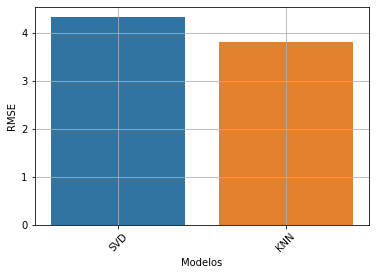

In [60]:
errores = {
    'Modelos': ['SVD', 'KNN'],
    
    'RMSE': [rmse_svd, rmse_knn]}

tabla_errores = pd.DataFrame(errores, columns = ['Modelos', 'RMSE'])

sns.barplot(x = 'Modelos', y = 'RMSE', data = tabla_errores)
plt.grid('y')
plt.xticks(rotation = 45)

Como se puede ver en el grafico anterior logramos mejorar la performance de nuestro modelo de Benchmark utilizando un modelo de filtro colaborativo y la implementacion de gridsearch para poder obtener los mejores parametros. 

#### Para pensar, investigar y, opcionalmente, implementar

1. ¿Cómo harías para ponerle un valor a la calificación?
1. ¿Cómo harías para agregar contenido? Por ejemplo, cuentas con el género, precio, fecha de lanzamiento y más información de los juegos.
1. ¿Hay algo que te gustaría investigar o probar?

1. Se podria obtener una valoracion por parte de los jugadores mas acertada generando una nueva variable haciendo uso de las horas jugadas por cada usuario ya que en este caso estamos tomando el metascore que es un valor proporcionado por la plataforma y no por los usuarios. Mucho mas util seria poder usar las reseñas de los usuarios mediante procesamiento de lenguaje natural para poder darle una valoracion numerica a cada juego jugado.

2. Se podrian agregar nuevas reseñas mediante el uso de web scrapping sobre la web de Steam.

3. Me gustaria poder mejorar el RMSE del modelo propuesto, tal vez probando con otro tipo de modelo o cambiando la variable utilizada para realizar las predicciones. 